In [1]:
import warnings
warnings.simplefilter(action='ignore',)

from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.kernels import QuantumKernel
quantum_instance = QuantumInstance(Aer.get_backend('statevector_simulator'), shots=128)

import numpy as np
from pylab import cm
from sklearn.svm import SVC
from utils import train_test_split

DATA_FILEPATH = "dataset_graph7.csv"
train_x, train_y, test_x, test_y = train_test_split(DATA_FILEPATH)

Optimized circuit

R gate: 12
H gate: 3
CNOT gate: 3


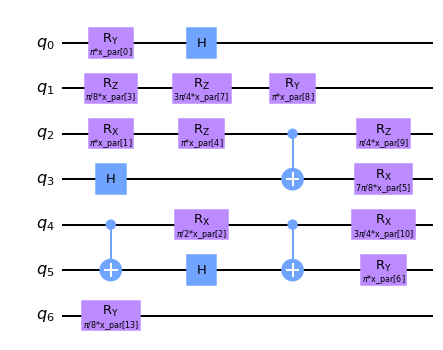

In [2]:
qc = QuantumCircuit(7)
x = ParameterVector('x_par', 14) 

print("R gate: 12\nH gate: 3\nCNOT gate: 3")

qc.ry(np.pi*x[0],0)
qc.h(0)

qc.rz((1/8)*np.pi*x[3],1)
qc.rz((3/4)*np.pi*x[7],1)
qc.ry(np.pi*x[8],1)

qc.rx(np.pi*x[1],2)
qc.rz(np.pi*x[4],2)

qc.h(3)
qc.cnot(2,3)
qc.rz((1/4)*np.pi*x[9],2)
qc.rx((7/8)*np.pi*x[5],3)

qc.cnot(4,5)
qc.rx((1/2)*np.pi*x[2],4)
qc.h(5)
qc.cnot(4,5)
qc.rx((3/4)*np.pi*x[10],4)
qc.ry(np.pi*x[6],5)

qc.ry((1/8)*np.pi*x[13],6)

qc.draw(output="mpl")

In [3]:
qc.p(0*x[11]*x[12],0)

ga_kernel = QuantumKernel(feature_map=qc, quantum_instance=quantum_instance,)
model_ga = SVC(kernel=ga_kernel.evaluate)
qsvm = model_ga.fit(train_x, train_y)
q_score = model_ga.score(test_x, test_y)

print(f'Test kernel acc: {q_score}')

Test kernel acc: 1.0


Test the necessity of  rotation gates

R gate: 12
H gate: 3
CNOT gate: 3


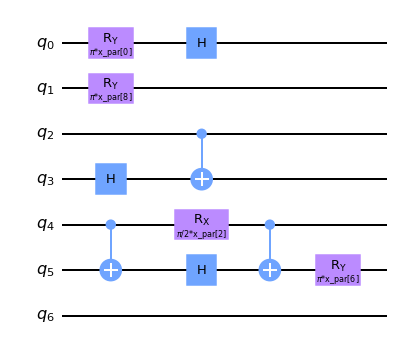

In [4]:
qc = QuantumCircuit(7)
x = ParameterVector('x_par', 14) 

print("R gate: 12\nH gate: 3\nCNOT gate: 3")

qc.ry(np.pi*x[0],0)
qc.h(0)

# qc.rz((1/8)*np.pi*x[3],1)
# qc.rz((3/4)*np.pi*x[7],1)
qc.ry(np.pi*x[8],1)

# qc.rx(np.pi*x[1],2)
# qc.rz(np.pi*x[4],2)

qc.h(3)
qc.cnot(2,3)
# qc.rz((1/4)*np.pi*x[9],2)
# qc.rx((7/8)*np.pi*x[5],3)

qc.cnot(4,5)
qc.rx((1/2)*np.pi*x[2],4)
qc.h(5)
qc.cnot(4,5)
# qc.rx((3/4)*np.pi*x[10],4)
qc.ry(np.pi*x[6],5)

# qc.ry((1/8)*np.pi*x[13],6)

qc.draw(output="mpl")

In [5]:
qc.p(0*x[0]*x[1]*x[3]*x[4]*x[5]*x[7]*x[9]*x[10]*x[11]*x[12]*x[13],0)

ga_kernel = QuantumKernel(feature_map=qc, quantum_instance=quantum_instance,)
model_ga = SVC(kernel=ga_kernel.evaluate)
qsvm = model_ga.fit(train_x, train_y)
q_score = model_ga.score(test_x, test_y)

print(f'Test kernel acc: {q_score}')

Test kernel acc: 1.0


Qubit 2 and 3 does not relevance with the data

R gate: 12
H gate: 3
CNOT gate: 3


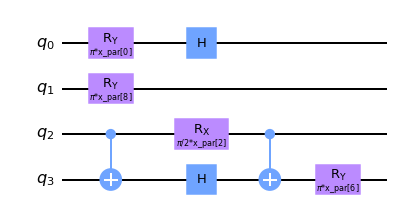

In [6]:
qc = QuantumCircuit(4)
x = ParameterVector('x_par', 14) 

print("R gate: 12\nH gate: 3\nCNOT gate: 3")

qc.ry(np.pi*x[0],0)
qc.h(0)

qc.ry(np.pi*x[8],1)

qc.cnot(2,3)
qc.rx((1/2)*np.pi*x[2],2)
qc.h(3)
qc.cnot(2,3)
qc.ry(np.pi*x[6],3)

qc.draw(output="mpl")

In [7]:
qc.p(0*x[0]*x[1]*x[3]*x[4]*x[5]*x[7]*x[9]*x[10]*x[11]*x[12]*x[13],0)

ga_kernel = QuantumKernel(feature_map=qc, quantum_instance=quantum_instance,)
model_ga = SVC(kernel=ga_kernel.evaluate)
qsvm = model_ga.fit(train_x, train_y)
q_score = model_ga.score(test_x, test_y)

print(f'Test kernel acc: {q_score}')

Test kernel acc: 1.0


Test the necessity of Hadamard gate and CNOT gates

R gate: 12
H gate: 3
CNOT gate: 3


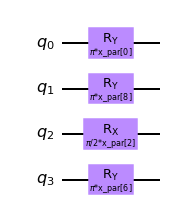

In [8]:
qc = QuantumCircuit(4)
x = ParameterVector('x_par', 14) 

print("R gate: 12\nH gate: 3\nCNOT gate: 3")

qc.ry(np.pi*x[0],0)
# qc.h(0)

qc.ry(np.pi*x[8],1)

# qc.cnot(2,3)
qc.rx((1/2)*np.pi*x[2],2)
# qc.h(3)
# qc.cnot(2,3)
qc.ry(np.pi*x[6],3)

qc.draw(output="mpl")

In [9]:
qc.p(0*x[0]*x[1]*x[3]*x[4]*x[5]*x[7]*x[9]*x[10]*x[11]*x[12]*x[13],0)

ga_kernel = QuantumKernel(feature_map=qc, quantum_instance=quantum_instance,)
model_ga = SVC(kernel=ga_kernel.evaluate)
qsvm = model_ga.fit(train_x, train_y)
q_score = model_ga.score(test_x, test_y)

print(f'Test kernel acc: {q_score}')

Test kernel acc: 1.0


Test each rotation gate again and combine qubits

R gate: 3
H gate: 0
CNOT gate: 0


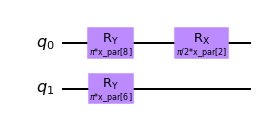

In [10]:
qc = QuantumCircuit(2)
x = ParameterVector('x_par', 14) 

print("R gate: 3\nH gate: 0\nCNOT gate: 0")

qc.ry(np.pi*x[8],0)
qc.rx((1/2)*np.pi*x[2],0)

qc.ry(np.pi*x[6],1)

qc.draw(output="mpl")

In [11]:
qc.p(0*x[0]*x[1]*x[3]*x[4]*x[5]*x[7]*x[9]*x[10]*x[11]*x[12]*x[13],1)

ga_kernel = QuantumKernel(feature_map=qc, quantum_instance=quantum_instance,)
model_ga = SVC(kernel=ga_kernel.evaluate)
qsvm = model_ga.fit(train_x, train_y)
q_score = model_ga.score(test_x, test_y)

print(f'Test kernel acc: {q_score}')

Test kernel acc: 1.0
